# Machine Learning

### Prediction using method of "The Forecasting Horizon"
#### Last month of Assault Ad Battery in Miami Dade, based on the last 3 months.
#### Data range from May 2015 up to June 2019. These extremes where removed because the lack of complete data on them. Data was grouped by Month-Year. 

#### Models of Supervised Learning to test: Linear Regression, Supervised Vector Regression (SVM) and Random Forest.

In [65]:
# Import Libraries.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [66]:
## Data from Battery and assault
df = pd.read_csv('Resources/data3_load_assault_group_to_ML.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Booking_year_month,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,3,3,2015-08,1013,153,14.0,3.0,7.0,4.0,0.0,...,23.0,21.0,14.0,142.0,0.0,0.0,0.0,2.0,52.0,54.0
1,4,4,2015-09,803,121,132.0,13.0,91.0,28.0,22.0,...,18.0,22.0,32.0,153.0,0.0,0.0,0.0,5.0,43.0,68.0
2,5,5,2015-10,1057,156,142.0,18.0,92.0,32.0,14.0,...,13.0,10.0,16.0,121.0,0.0,0.0,0.0,5.0,44.0,46.0
3,6,6,2015-11,774,114,153.0,15.0,112.0,26.0,24.0,...,18.0,26.0,23.0,0.0,0.0,0.0,156.0,4.0,46.0,75.0
4,7,7,2015-12,891,129,121.0,11.0,84.0,26.0,13.0,...,13.0,17.0,8.0,0.0,0.0,0.0,114.0,3.0,42.0,52.0


In [67]:
# Drop innecesary columns
df.drop(['Unnamed: 0', 'Booking_year_month'], axis=1, inplace=True)
# df['total_crime']= df['total_crime'].astype(float)

In [68]:
# Choosing X and Y 

# Independent Variable (X): Variable used to predict the dependent variable or input
# Dependent Variable (y): Variable being predictive or output

# Reshape (Sklearn is expecting a 2-Dimensional Array in order to properly fit your model, so as X have more than one feature,
# then we DO NOT have to use .reshape()).

X = df.drop('total_crime', axis=1)
y = df['total_crime'].values.reshape(-1, 1)

print(X.shape, y.shape)
#print(X)

(47, 56) (47, 1)


In [69]:
# Train and Test Split using sklearn 
# The split of the data in not aleatory "test_size=10" because we have linear data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=10)

# Notice here that you can set the test_size = 0.2. This means that it's an 80/20 split between the Training set and Test set. 
# Make sure you are using 70%-80% of your data as the Training Set and the rest as a Test Set
# NEVER USE THE DATA FROM THE TEST SET TO FIT THE MODEL 
# Sklearn's `train_test_split` by default split the data in random way, giving to us different predictions each time the model runs, that is why we
# of the 45 months we choose 35 months for training and 10  for testing.

In [70]:
df.head()

,Unnamed: 0.1,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,3,1013,153,14.0,3.0,7.0,4.0,0.0,0.0,0.0,...,23.0,21.0,14.0,142.0,0.0,0.0,0.0,2.0,52.0,54.0
1,4,803,121,132.0,13.0,91.0,28.0,22.0,13.0,23.0,...,18.0,22.0,32.0,153.0,0.0,0.0,0.0,5.0,43.0,68.0
2,5,1057,156,142.0,18.0,92.0,32.0,14.0,13.0,29.0,...,13.0,10.0,16.0,121.0,0.0,0.0,0.0,5.0,44.0,46.0
3,6,774,114,153.0,15.0,112.0,26.0,24.0,17.0,20.0,...,18.0,26.0,23.0,0.0,0.0,0.0,156.0,4.0,46.0,75.0
4,7,891,129,121.0,11.0,84.0,26.0,13.0,22.0,23.0,...,13.0,17.0,8.0,0.0,0.0,0.0,114.0,3.0,42.0,52.0


In [71]:
# Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# We do this step because we will make our algorithm resilient to noise or High variance in the dataset 
# StandardScaler applies a Guassian distribution to our data (NORMAL DISTRIBUTION), where the mean is 0 and the standard deviation is 1. 
# Some algorithms have a difficult time extracting information for a tight group set of points. 
# StandardScaler will spread them out. 
#.fit() part actually generates metdata that we need to perform the Standard Scaling functionality. 
# X_scaler is now a function.
# ONLY PERFORM THIS STEP ON THE TRAINING DATA


In [72]:
# CREATE FIT & PREDICT.

# We will be implementing Supervised Learning Models as: Random Forest, Linear Regression and Supervised vector Regression.

# We will get the MAE and MSE for each model.
# Plot on the date_train_range the y_train_predict (blue) vs y_train (green)
# Plot on the date_test_range the y_test_predict (red) vs y_test (yellow)
# Percentage residual Scatter plot over the time.


## Random Forest (Regression)

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# We tested the Random Forest model with 75, 100, 200, 300, 500 trees, and with the random seed = 1
# the best estimator was 75 trees.

model = RandomForestRegressor(n_estimators=200, random_state=1)

# Fitting our model with all of our features in X
model.fit(X_train_scaled , y_train_scaled)

# Predicting
y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# The model.fit() is what creates the "line" in our model which allows us to get the Bias=y-intercept and Weigtht = slope.
# X_train and Y_train represent the 2-Dimensional arrays mentioned above.
# model.predict will test the new points in our Linear Regression model. 

# Calculate the MAE and MSE()
randomF_mae = mean_absolute_error(y_prediction, y_test)
randomF_mse = mean_squared_error(y_prediction, y_test)

print("Mean Absolute Error = ", randomF_mae) 
print("Mean Squarred Error= ", randomF_mse) 
# Please note, the MSE do not is affected by the negative difference values. 
# (the Square root of the mse should be approximately to the mae)

# Mean Square Error (MSE): looking to get close to 0
# It calculates the error = ACTUAL - PREDICTED
# Squares the difference
# Sums up all those errors and divides by the number of points in the dataset

Mean Absolute Error =  5.492999999999998
Mean Squarred Error=  58.19232499999997


C:\Users\BohuCyn\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [74]:
# The Data has been scaled, we will transform the data to plot, "Train data predicted vs Train Data" and "Test Predicted vs Test Data"

y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

In [75]:
y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

In [76]:
len(y_train_predict)

37

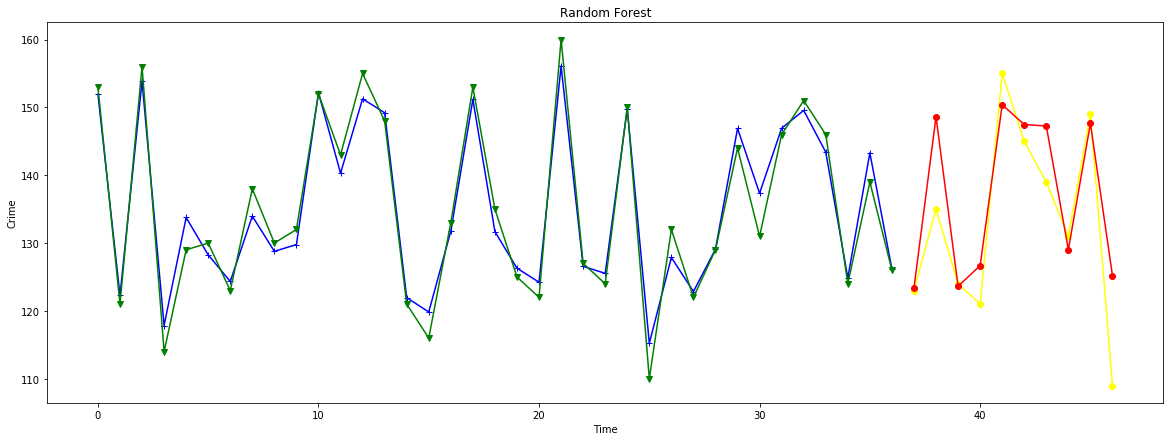

In [77]:
# Linear Plot over the time: "Train Data Predicted VS Train Data" and "Test Predicted VS Test Data"

plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("Random Forest")
# plt.legend("Y Train Predict", loc="best")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("Images/Random_Forest.png")

In [78]:
# The original data has an array format and we want to plot residuals 
date_train_range = np.array([i for i in date_train_range])
date_test_range = np.array([i for i in date_test_range])

# Values for Residual plot
train_perc =np.array((y_train.reshape(-1,1) - y_train_predict.reshape(-1,1))*100/y_train.reshape(-1,1))
test_perc =np.array((y_test.reshape(-1,1) - y_test_predict.reshape(-1,1))*100/y_test.reshape(-1,1))
#train_perc

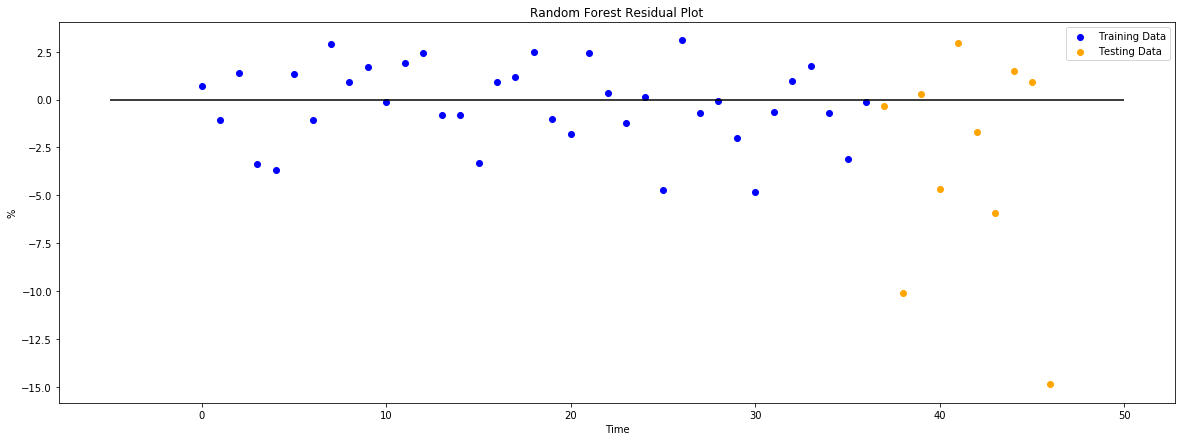

In [79]:
# Residual Plot
plt.figure(figsize=(20,7))
plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("Random Forest Residual Plot")
plt.xlabel("Time")
plt.ylabel("%")
plt.savefig("Images/Random_Forest_Residual_Plot.png")


## Considerations
# Purspose: Visualize the assumptions made from the model and see the difference between Independent Variables on X-axis and theresiduals
# on the y-axis (ACTUAL - PREDICTED)
# Checking the variance of our model to see if it's consistent throughout
# Be aware that this comparison is done on both the Training and Test set. 
# The training data in this case is Blue and the Testing Data is Orange


## Linear Regression Model

In [80]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

# Fitting our model with all of our features in X:
model.fit(X_train_scaled , y_train_scaled)

# Predicting
y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# Calculate the MAE and MSE()
linear_reg_mae = mean_absolute_error(y_prediction, y_test)
linear_reg_mse = mean_squared_error(y_prediction, y_test)

print("Mean Absolute Error = ", linear_reg_mae) 
print("Mean Squarred Error= ", linear_reg_mse) 
# Please note, MSE do not is affected by the negative difference values. 
# (the Square root of the mse should be approximately to the mae)

#r2 = r2_score(y_prediction, y_test)
#print("R2 score = ", r2)

Mean Absolute Error =  14.178315009331664
Mean Squarred Error=  287.89772284685694


In [81]:
# The Dtaa has been scaled, we will transform the data
y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

In [82]:
len(y_train_predict)

37

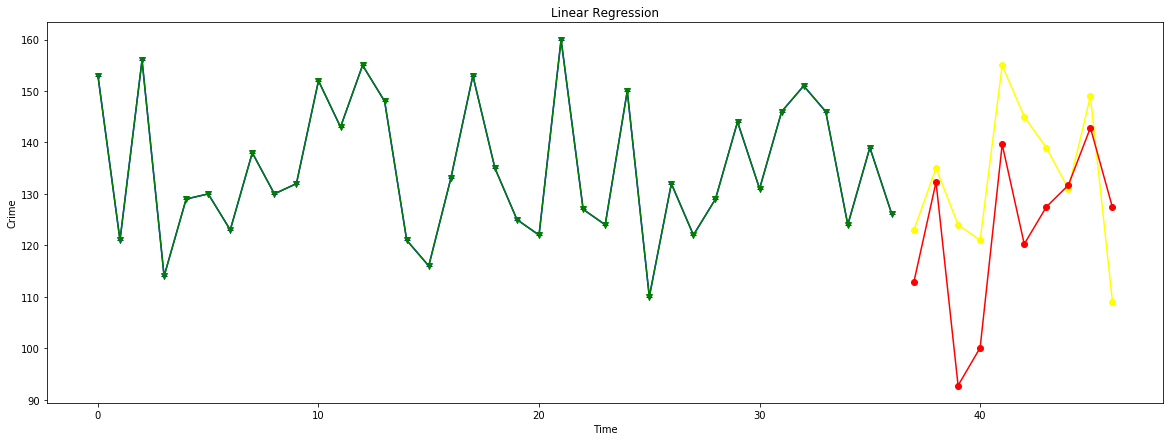

In [83]:
# Plot "Train Data Predicted VS Train Data" and "Test Predict VS Test"
plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("Linear Regression")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("Images/Linear_Regression.png")

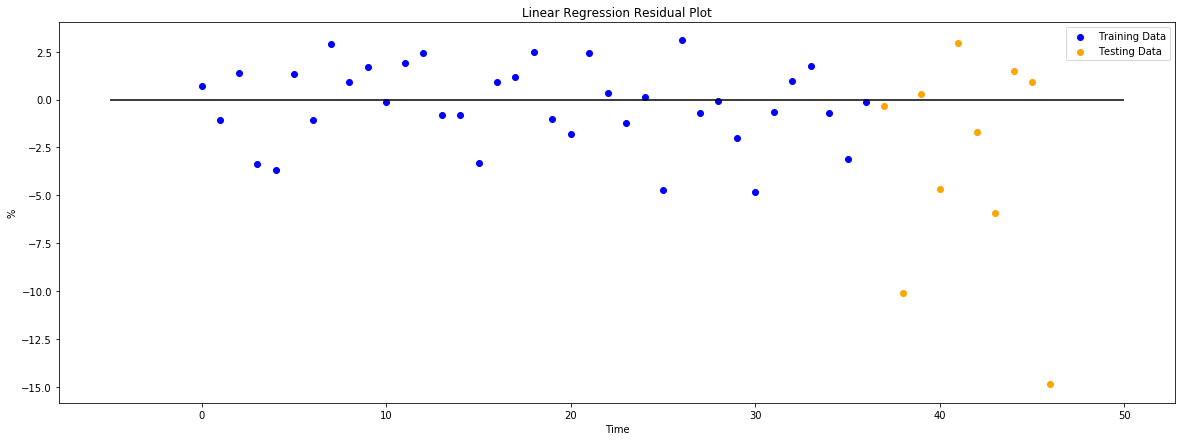

In [84]:
# #Residual Plot
plt.figure(figsize=(20,7))
plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("Linear Regression Residual Plot")
plt.xlabel("Time")
plt.ylabel("%")
plt.savefig("Images/Linear_Regression_Residual_Plot.png")

## SVR

In [85]:
from sklearn import svm
from sklearn.svm import SVR

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#model = svm.SVR(gamma='scale', C=1.0, epsilon=0.2)
model = svm.SVR(gamma='scale', C=1.0, epsilon=0.2)
# Fitting our model with all of our features in X

model.fit(X_train_scaled , y_train_scaled)
y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# Calculate the MAE and MSE()
svr_mae = mean_absolute_error(y_prediction, y_test)
svr_mse = mean_squared_error(y_prediction, y_test)


print("SVR Mean Absolute Error = ", svr_mae) 
print("SVR Mean Squarred Error= ", svr_mse) 

SVR Mean Absolute Error =  10.15853317841001
SVR Mean Squarred Error=  144.05632868675337


C:\Users\BohuCyn\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

In [88]:
y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

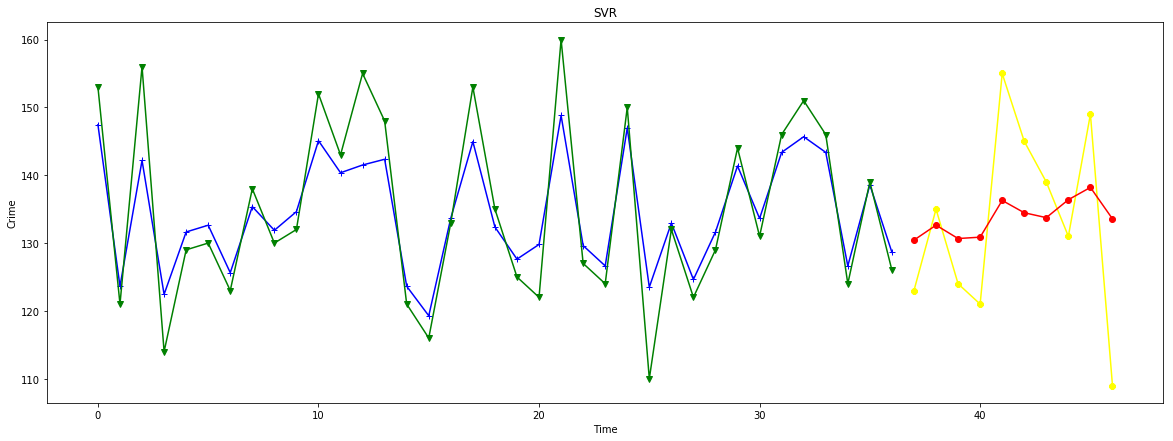

In [89]:
# Plot "Train Data Predicted VS Train Data" and "Test Predict VS Test"

plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("SVR")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("Images/SVR.png")

In [90]:
# The original data has an array format, to can get the differernce we need to :
date_train_range = np.array([i for i in date_train_range])
date_test_range = np.array([i for i in date_test_range])

# the values for the Residual plot
train_perc =np.array((y_train.reshape(-1,1) - y_train_predict.reshape(-1,1))*100/y_train.reshape(-1,1))
test_perc =np.array((y_test.reshape(-1,1) - y_test_predict.reshape(-1,1))*100/y_test.reshape(-1,1))

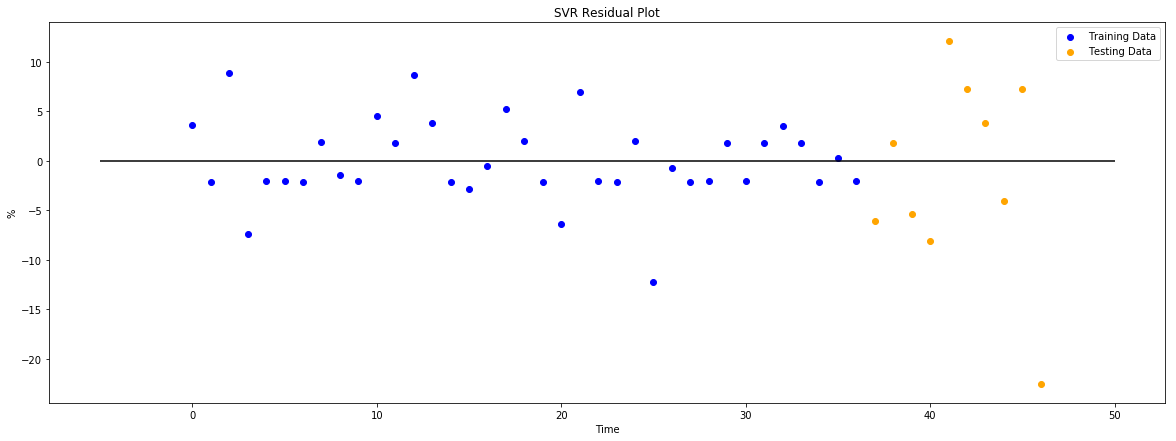

In [91]:
#Residual Plot SVR
plt.figure(figsize=(20,7))
plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("SVR Residual Plot")
plt.xlabel("Time")
plt.ylabel("%")
plt.savefig("Images/SVR_Residual_Plot.png")

In [92]:
print("Random Forest mae and mse:")
print("")
print("Mean Absolute Error= ", randomF_mae) 
print("Mean Squarred Error= ", randomF_mse)
print("")
print("#----------------------------------------#")
print("Linear Regression mae and mse:")
print("")
print("Mean Absolute Error = ", linear_reg_mae) 
print("Mean Squarred Error= ", linear_reg_mse)
print("")
print("#----------------------------------------#")
print("SVR mae and mse:")
print("")
print("Mean Absolute Error = ", svr_mae) 
print("Mean Squarred Error= ", svr_mse) 
print("")
print("#----------------------------------------#")

Random Forest mae and mse:

Mean Absolute Error=  5.492999999999998
Mean Squarred Error=  58.19232499999997

#----------------------------------------#
Linear Regression mae and mse:

Mean Absolute Error =  14.178315009331664
Mean Squarred Error=  287.89772284685694

#----------------------------------------#
SVR mae and mse:

Mean Absolute Error =  10.15853317841001
Mean Squarred Error=  144.05632868675337

#----------------------------------------#


In [93]:
# Conclusion:

# The best mae and mse between the models belongs to Random Forests. 
# As our data it is not big enough, we used simples models, as basic models fits well with small data. 
# Prediction it not as accurate as we expect that why we will recommend to collect more years and features to do a better forecasting.